# Importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import polars as pl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path= r'C:\Users\ANITA BOADU\Instacart Basket Analysis'

# Read pickle with Pandas
df_pd = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merge_custs_4.9.pkl'))

# Convert to Polars
ords_prods_merge_custs = pl.from_pandas(df_pd)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ANITA BOADU\\Instacart Basket Analysis\\Data\\Prepared Data\\ords_prods_merge_custs_4.9.pkl'

In [2]:
ords_prods_merge_custs.shape

(30356957, 26)

In [3]:
ords_prods_merge_custs.head()

Unnamed: 0,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,spending_flag,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
i64,i64,i64,str,i64,i64,i64,f64,i64,i64,i64,str,f64,f64,f64,i64,str,str,str,str,str,i64,str,i64,str,i64
1,2398795,1,"""prior""",2,3,7,15.0,196,1,1,"""Soda""",77.0,7.0,9.0,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,"""prior""",2,3,7,15.0,10258,2,0,"""Pistachios""",117.0,19.0,3.0,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,"""prior""",2,3,7,15.0,12427,3,1,"""Original Beef Jerky""",23.0,19.0,4.4,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,"""prior""",2,3,7,15.0,13176,4,0,"""Bag of Organic Bananas""",24.0,4.0,10.3,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423
1,2398795,1,"""prior""",2,3,7,15.0,26088,5,1,"""Aged White Cheddar Popcorn""",23.0,19.0,4.7,10,"""New customer""","""Low spender""","""Non-frequent customer""","""Female""","""Alabama""",31,"""2/17/2019""",3,"""married""",40423


##### 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.


####### In a markdown cell beneath your histogram, describe what the histogram demonstrates. 

#########To create an histogram of 'order_hour_of-day', i will have to convert the order_hour_of _day column to pandas.

In [4]:
#converting order_hour_of_day in ords_prods_merge_custs dataframe to pandas
order_hour_of_day = ords_prods_merge_custs.select('order_hour_of_day').to_pandas()

In [5]:
#check output
order_hour_of_day.head()

,order_hour_of_day
0,7
1,7
2,7
3,7
4,7


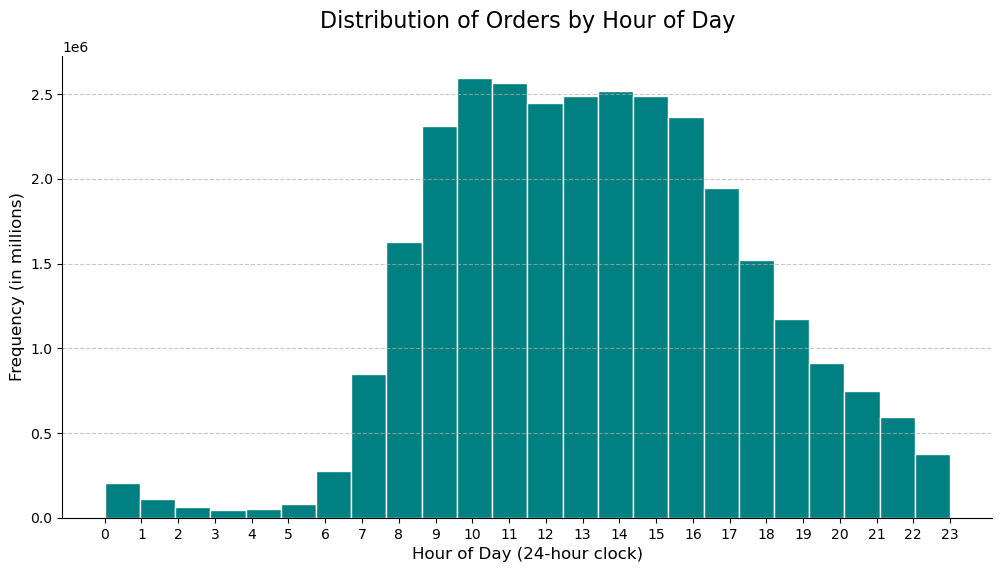

In [6]:
# 1. Prepare the data (convert Polars column to a format for plotting)
hour_data = ords_prods_merge_custs['order_hour_of_day'].to_pandas()

# 2. Create the figure
plt.figure(figsize=(12, 6))
hist = plt.hist(hour_data, bins=24, color='teal', edgecolor='white')

# 3. Add Clarity (Titles and Labels)
plt.title('Distribution of Orders by Hour of Day', fontsize=16, pad=20)
plt.xlabel('Hour of Day (24-hour clock)', fontsize=12)
plt.ylabel('Frequency (in millions)', fontsize=12)

# 4. Improve Readability (X-axis ticks)
plt.xticks(range(0, 24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# 5. Professional touch: remove top/right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 6. SAVE BEFORE SHOWING (This prevents the empty file issue)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'refined_hour_histogram.png'), 
            dpi=300, bbox_inches='tight')

# 7. Display the plot
plt.show()

######## The histogram teCustomers are most active in ordering during typical daytime hours, especially mid-morning to early afternoon.The low volume during early morning and late night hours likely reflects typical human daily activity patterns.Businesses could use this information to plan staffing, inventory, or promotions targeted at peak hours.

###### 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column

#######To create a bar chart of 'loyalty_flag', i will have to convert the loyalty_flag column from polars column to pandas.

In [7]:
#converting loyalty_flag in ords_prods_merge_custs dataframe to pandas
loyalty_flag = ords_prods_merge_custs.select('loyalty_flag').to_pandas()

In [8]:
#check output
loyalty_flag.value_counts()

loyalty_flag    
Regular customer    15095623
Loyal customer      10105134
New customer         5156200
Name: count, dtype: int64

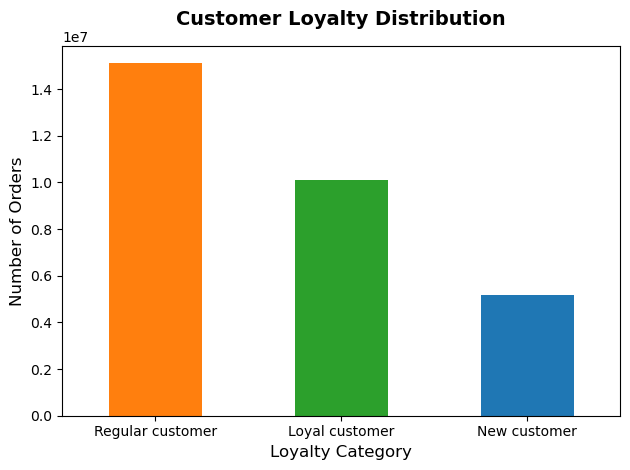

In [9]:
import matplotlib.pyplot as plt

# 1. Prepare and clean the labels
# This code removes the parentheses and commas from your current index
loyalty_counts = loyalty_flag.value_counts()
clean_labels = [str(i).strip("()',") for i in loyalty_counts.index]

# 2. Define your colors (e.g., Orange, Green, Blue)
colors = ['#ff7f0e', '#2ca02c', '#1f77b4']

# 3. Create the plot
# 'rot=0' makes the labels horizontal so they are easier to read
bar_loyalty = loyalty_counts.plot.bar(color=colors, rot=0)

# 4. Apply the cleaned labels to the X-axis
plt.xticks(range(len(clean_labels)), clean_labels)

# 5. Add titles and axis labels for a professional look
plt.title('Customer Loyalty Distribution', fontsize=14, fontweight='bold', pad=15)
plt.ylabel('Number of Orders', fontsize=12)
plt.xlabel('Loyalty Category', fontsize=12)

# 6. Use tight_layout to ensure nothing is cut off when exported
plt.tight_layout()

# 7. Export the chart as a high-resolution image
# 'bbox_inches=tight' is critical to ensure labels are visible in the saved file
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_loyalty_final.png'), bbox_inches='tight', dpi=300)

plt.show()

#### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

####### i want to avoid converting the whole ords_prods_merge_custs dataframe to pandas because its a very large file, so i will use only select the neccessary colunmns i need in the exercise 'order_hour_of _day', 'prices', 'age', 'number_of_dependants', income together as a new data set and convert only those columns to pandas. then do 70/30 split sampling method of the dataset.

In [10]:
#converting order_hour_of_day and prices together as a dataframe to pandas
new_pd = ords_prods_merge_custs.select(["order_hour_of_day", "prices", "age", "number_of_dependants", "income"]).to_pandas()

In [11]:
#check output
new_pd.head()

,order_hour_of_day,prices,age,number_of_dependants,income
0,7,9.0,31,3,40423
1,7,3.0,31,3,40423
2,7,4.4,31,3,40423
3,7,10.3,31,3,40423
4,7,4.7,31,3,40423


In [12]:
#Create a random sample 
np.random.seed(4)

In [13]:
#create a list of holding True/False values to the test np.ransom.rand()<=0.7
dev = np.random.rand(len(new_pd)) <= 0.7

In [17]:
#store 70% of the sample in the data frame big
big = new_pd [dev]

In [18]:
#store 30% or the sample in the dataframe small
small = new_pd [~dev]

In [19]:
#check output
len(new_pd)

30356957

In [20]:
len(big) + len(small)

30356957

In [24]:
#check output
new_pd

,order_hour_of_day,prices,age,number_of_dependants,income
0,7,9.0,31,3,40423
1,7,3.0,31,3,40423
2,7,4.4,31,3,40423
3,7,10.3,31,3,40423
4,7,4.7,31,3,40423
...,...,...,...,...,...
30356952,12,5.6,74,3,137969
30356953,12,5.9,74,3,137969
30356954,12,4.2,74,3,137969
30356955,12,4.9,74,3,137969


In [21]:
# A new dataframe that contains only the "prices" and "order_hour_of_day" columns from small subset
df_2 = small[['order_hour_of_day','prices']]

In [22]:
#check output
df_2

,order_hour_of_day,prices
0,7,9.0
2,7,4.4
3,7,10.3
6,12,9.0
10,12,3.2
...,...,...
30356943,12,11.8
30356949,12,11.5
30356951,12,3.3
30356952,12,5.6


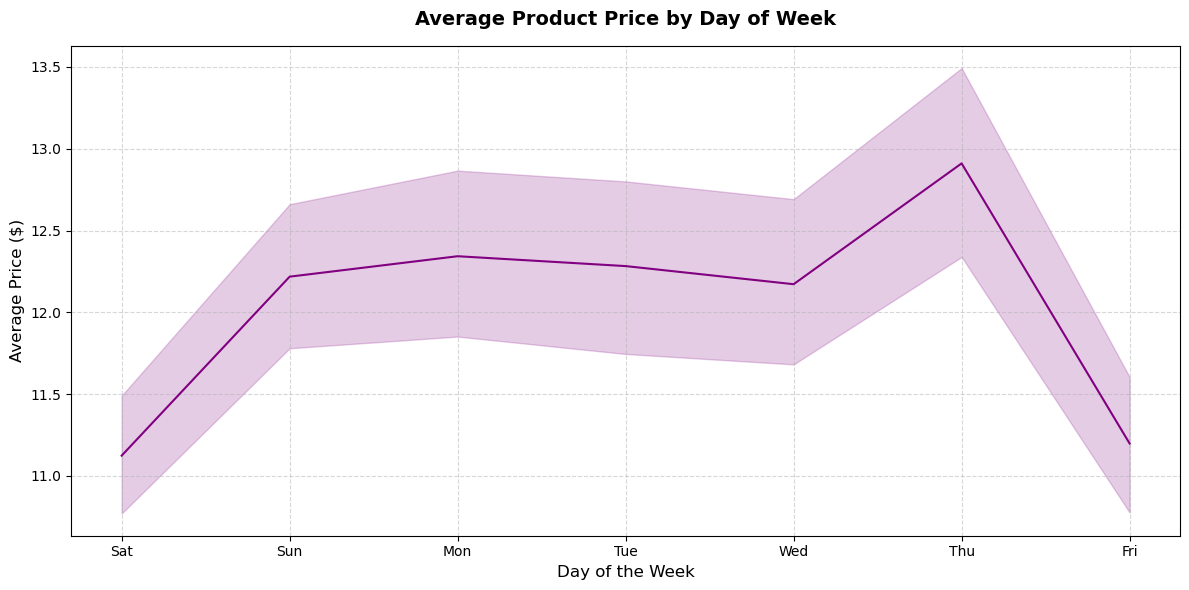

In [23]:
# Create the figure
plt.figure(figsize=(12, 6))

# Plotting Day of Week vs Price
# This uses the data seen in your previous line chart
line_day = sns.lineplot(data=df_pd, x='order_day_of_week', y='prices', color='purple')

# Improve Labels: Mapping 0-6 to Day Names
plt.xticks(range(7), ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

# Professional Styling
plt.title('Average Product Price by Day of Week', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Export for presentation
plt.tight_layout()
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_day_vs_price_final.png'), bbox_inches='tight', dpi=300)

plt.show()

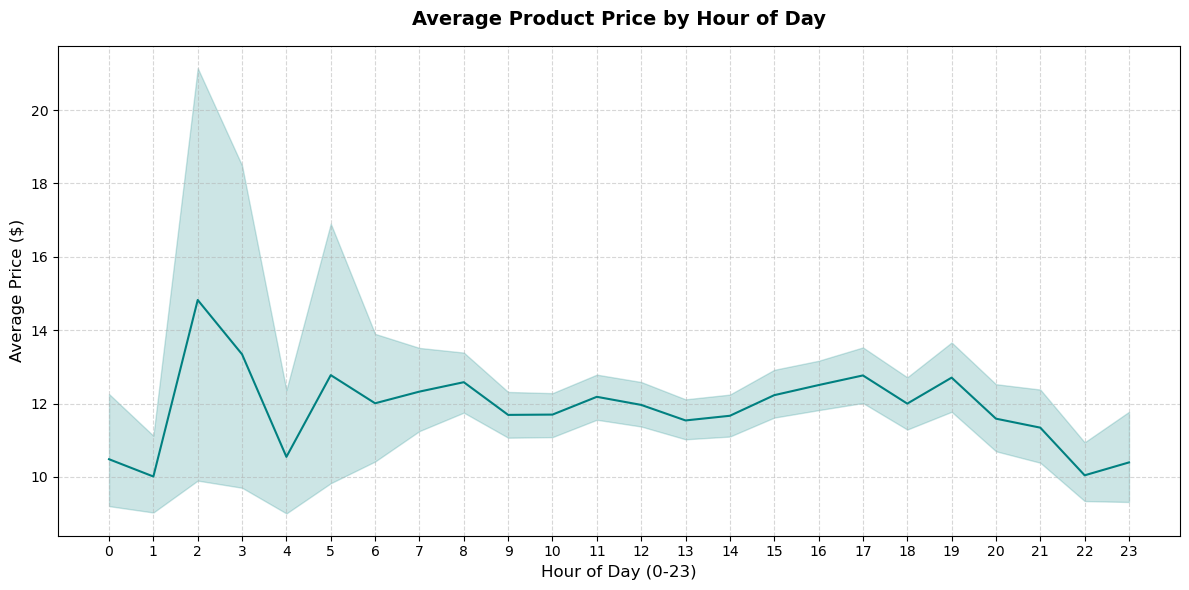

In [24]:
# Create the figure
plt.figure(figsize=(12, 6))

# Plotting Hour of Day vs Price
# This uses the data from your hour-based line chart
line_hour = sns.lineplot(data=df_pd, x='order_hour_of_day', y='prices', color='teal')

# Professional Styling: Ensure every hour is marked
plt.xticks(range(0, 24))
plt.title('Average Product Price by Hour of Day', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Hour of Day (0-23)', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Export for presentation
plt.tight_layout()
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_hour_vs_price_final.png'), bbox_inches='tight', dpi=300)

plt.show()

#### 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

#####In a markdown cell beneath your line chart, describe what the line chart shows.

In [25]:
#new dataframe that contains only the "age" and "number_of_dependants" columns from small subset
df_3 = small[['age','number_of_dependants']]

In [26]:
#check output
df_3

,age,number_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
30356943,74,3
30356949,74,3
30356951,74,3
30356952,74,3


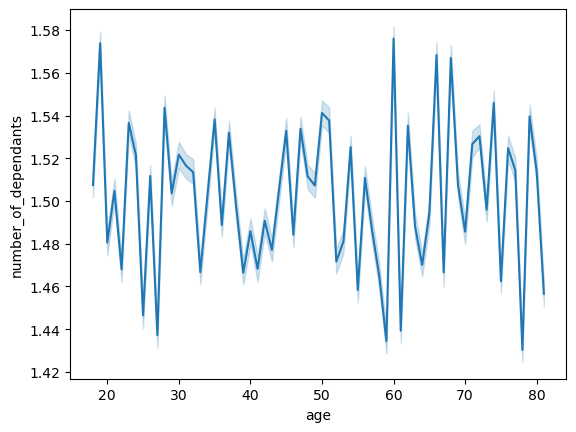

In [28]:
#Create the line chart
line_2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependants')

#####This suggests the number of dependents is somewhat stable but fluctuates slightly with age.Possibly, people in their 30s-50s have dependents (children or others), while older and younger groups have fewer. The fluctuations could be due to sample size differences or natural variability.

## 7.You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [29]:
#Create a new dataframe that contains only the "age" and "income" columns from small subset 
df_4 = small[['age','income']]

In [30]:
#check output
df_4

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423
...,...,...
30356943,74,137969
30356949,74,137969
30356951,74,137969
30356952,74,137969


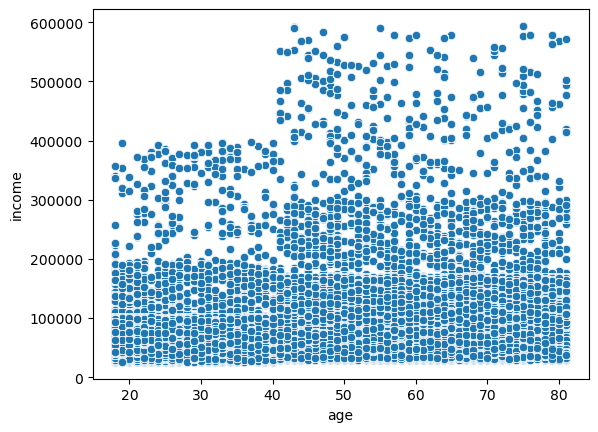

In [37]:
#Create a scatterplot
scatterplot = sns.scatterplot(data = df_4, x = 'age', y = 'income')

########Income distribution is broad at every age group.Factors beyond age (e.g., profession, education, experience) likely affect income significantly. The presence of many lower income points could reflect entry-level or part-time workers. The scattered high earners may represent senior professionals or specialized roles.

In [32]:
path = r'C:\Users\ANITA BOADU\Instacart Basket Analysis'
save_dir = os.path.join(path, 'Analysis', 'Visualizations')

os.makedirs(save_dir, exist_ok=True)




In [35]:
#Export Line chart - connections between age and number of dependents
line_2.figure.savefig(os.path.join(save_dir, 'line_chart_age_and_number_of_dependents.png'))

In [38]:
#Export scatterplot - connection between age and spending power (income)
scatterplot.figure.savefig(os.path.join(save_dir, 'scatterplot_age_and _income.png'))

In [39]:
# ... (all your plotting and labeling code here) ...

# 1. Save the file FIRST
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'refined_hour_histogram.png'), 
            dpi=300, bbox_inches='tight')

# 2. Show the plot SECOND
plt.show()

<Figure size 640x480 with 0 Axes>

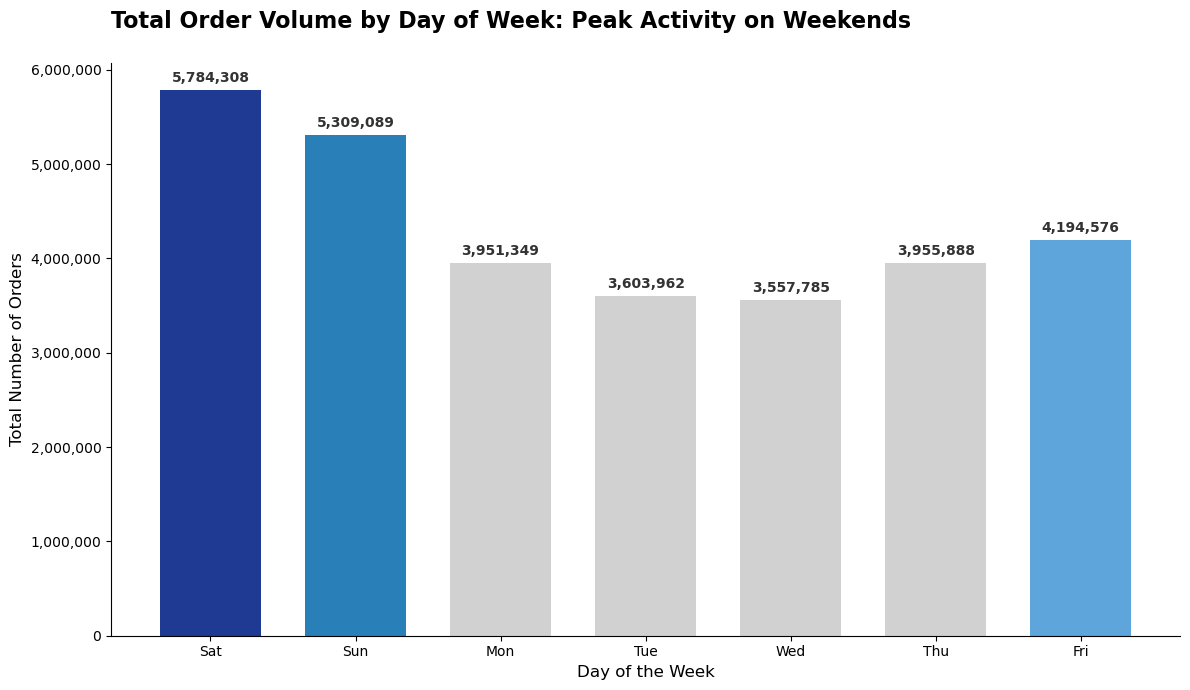

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# 1. Calculate the total frequency of orders for each day
order_volume_counts = df_pd['order_day_of_week'].value_counts().sort_index()

# 2. Create the Bar Chart
plt.figure(figsize=(12, 7))

# STRATEGIC COLOR LOGIC: 
# Dark Blue for the Weekend Peaks (0, 1), Light Blue for Friday (6), Grey for Mid-week
colors = ['#1f3a93', '#2980b9', '#d1d1d1', '#d1d1d1', '#d1d1d1', '#d1d1d1', '#5da5da']

# Change plot to bar
bars = plt.bar(order_volume_counts.index, order_volume_counts.values, color=colors, width=0.7)

# 3. Professional Formatting
plt.title('Total Order Volume by Day of Week: Peak Activity on Weekends', 
          loc='left', fontsize=16, fontweight='bold', pad=25)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Number of Orders', fontsize=12)

# Mapping the numeric index to Day Names
plt.xticks(range(7), ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'])

# Removing scientific notation and adding commas (e.g., 6,000,000)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Removing the top and right spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 4. Add Data Labels (The "Senior Analyst" Touch)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50000,
             f'{int(height):,}', ha='center', va='bottom', 
             fontweight='bold', color='#333333', fontsize=10)

# 5. EXPORT
plt.tight_layout()
save_path = os.path.join(path, 'Analysis', 'Visualizations', 'orders_day_of_week_bar.png')
plt.savefig(save_path, dpi=300)

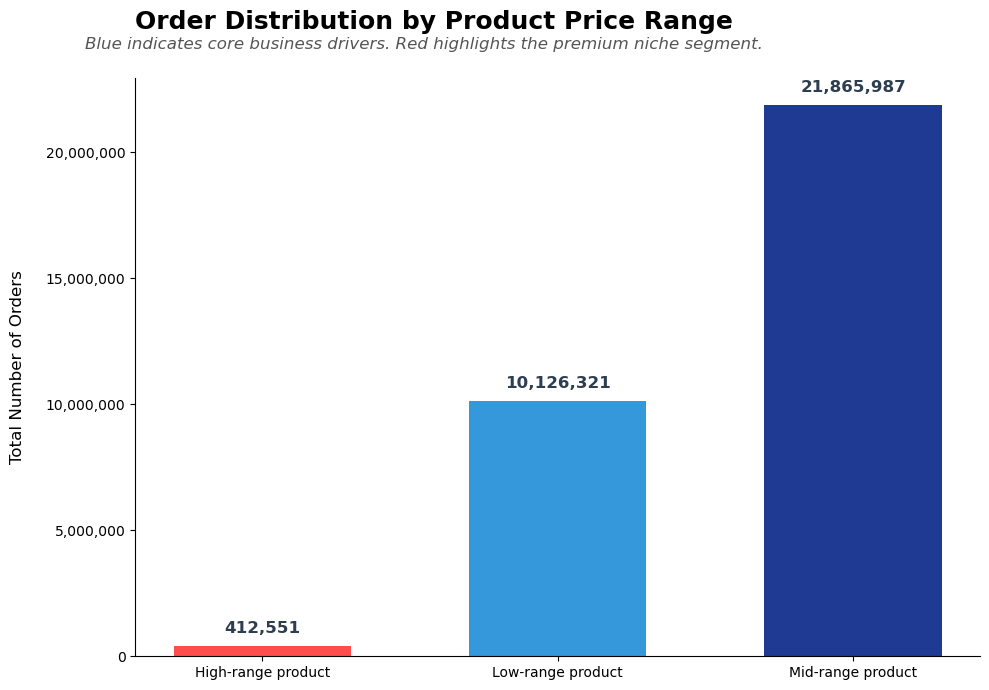

File successfully exported to: C:\Users\ANITA BOADU\Instacart Basket Analysis\Analysis\Visualizations\price_range_distribution_final.png


In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# 1. Prepare Data (using counts from your provided screenshot)
price_labels = ['High-range product', 'Low-range product', 'Mid-range product']
order_counts = [412551, 10126321, 21865987]

# 2. Setup Figure
fig, ax = plt.subplots(figsize=(10, 7))

# 3. STRATEGIC COLOR LOGIC
# Deep Blue = High Performance | Red = Growth Opportunity/Niche
colors = ['#ff4d4d', '#3498db', '#1f3a93'] 

# 4. Create the Vertical Bar Chart
bars = ax.bar(price_labels, order_counts, color=colors, width=0.6)

# 5. Executive Formatting
ax.set_title("Order Distribution by Product Price Range", 
             loc='left', fontsize=18, fontweight='bold', pad=35)
ax.set_ylabel("Total Number of Orders", fontsize=12, labelpad=15)

# Subtitle to provide instant context for the 20-year analyst
ax.text(-0.06, 1.05, "Blue indicates core business drivers. Red highlights the premium niche segment.", 
        transform=ax.transAxes, fontsize=12, color='#555555', style='italic')

# Remove "Chart Junk" (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Format Y-axis with commas (e.g., 21,865,987)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 6. Add Bold Data Labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 400000,
            f'{int(height):,}', ha='center', va='bottom', 
            fontweight='bold', color='#2c3e50', fontsize=12)

# 7. EXPORT COMMAND
# This saves the file directly into your Visualizations folder
plt.tight_layout()
save_path = os.path.join(path, 'Analysis', 'Visualizations', 'price_range_distribution_final.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()
print(f"File successfully exported to: {save_path}")